# Introduction to Probability, Statistics and Data Handling
## Lab report - Part 2

### I. CONFIDENCE INTERVALS
    
The Specific Absorption Rate (SAR) for a cell phone measures the amount of radio frequency (RF) energyabsorbed by the user’s body when using the handset. Every cell phone emits RF energy. Different phonemodelshave different SAR measures. 
    
To receive certification from the Federal Communications Commis-sion (FCC) forsale in the United States, the SAR level for a cell phone must be no more than 1.6 watts per kilogram. Table shows the highest SAR level for a random selection of cell phone models as measured by the FCC
    
        (This OpenStax book at http://cnx.org/content/col11562/1.18)

In [10]:
import pandas as pd
import seaborn as sns

In [11]:
SAR = pd.DataFrame(data = [1.11, 1.48, 1.43, 1.3, 1.09, 0.455, 1.41, 0.82, 0.78, 1.25, 1.36, 1.34, 1.18, 1.3, 1.26, 1.29, 0.36, 0.52, 1.6 ,1.39, 0.74, 0.5, 0.4, 0.867, 0.68, 0.51, 1.13, 0.3, 1.48, 1.38])

In [12]:
SAR.columns = ['SAR']

In [13]:
SAR.head(5)

,SAR
0,1.11
1,1.48
2,1.43
3,1.30
4,1.09


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8e12b5690>]],
      dtype=object)

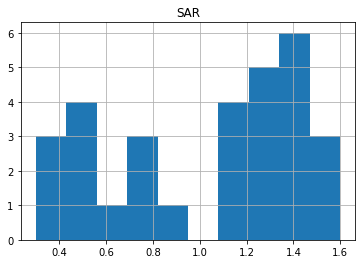

In [14]:
SAR.hist()

In [15]:
SAR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 1 columns):
SAR    30 non-null float64
dtypes: float64(1)
memory usage: 368.0 bytes


In [32]:
mean = SAR.mean()

In [33]:
mean

SAR    1.023733
dtype: float64

In [18]:
sigma = 0.337

In [20]:
from scipy.stats import norm
from math import sqrt

In [142]:
norm.interval(0.95, loc = mean, scale = sigma/sqrt(30))

(array([0.90314165]), array([1.14432502]))

In [87]:
norm.interval(0.98, loc = mean, scale = sigma/sqrt(30))

(array([0.88059896]), array([1.1668677]))

In [44]:
from scipy.stats import t

In [24]:
sigma_est = SAR.std()

In [88]:
t.interval(0.95, loc = mean, scale = sigma_est/sqrt(30), df = 29)

(array([0.87328174]), array([1.17418493]))

In [89]:
t.interval(0.98, loc = mean, scale = sigma_est/sqrt(30), df = 29)

(array([0.84262162]), array([1.20484505]))

### Conclusion:
*including the sample size (using the t-student distribution) widens the confidence interval with respect to the increasing uncertainty when using the small sample*

## II. Hypotheses testing
    1. Basing on sample from the Table calculate the mean SAR 𝑥̅. Assuming the significance level 𝛼=0.05, can it be concluded that the population mean is 1.024 with the alternative hypothesis that population mean is higher than 1.024?
    
    2.Calculate the p-value. 
    
    3.Change 𝛼=0.1 and repeat  1. and 2.

H0: mu = 1.024

H1: mu > 1.024

In [95]:
print("mean = ", mean[0])

mean =  1.0237333333333332


In [99]:
print("stdev = ", sigma_est[0]/sqrt(30))

stdev =  0.0735622018967127


In [100]:
from scipy.stats import ttest

In [127]:
ttest = ttest_1samp(a = SAR,popmean= 1.024)

In [140]:
print('the pvalue for the right-side t-test is equal to: {:.5f}'.format(ttest.pvalue[0]/2) )

the pvalue for the right-side t-test is equal to: 0.49857


This proves that neither alpha = 0.05 nor 0.1 will be sufficient enough to reject the null hyphotesis